In [1]:
import json

with open('../data/train.json', 'r') as file:
    train_data = json.load(file)

with open('../data/dev.json', 'r') as file:
    test_data = json.load(file)

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [3]:
class Dataset_Reader(Dataset):
    def __init__(self, data):
        self.data = data

        self.texts = []
        self.labels = []
        for idx, document in enumerate(data):
            current_id = document['id']
            # current_meta = document['meta']['group']
            for annotation in document['annotations']:
                for sentence in annotation['result']:
                    text = sentence['value']['text'].lower().replace('\n', '')
                    label = sentence['value']['labels'][0]

                    self.texts.append(text)
                    self.labels.append(label)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {
            'text': self.texts[idx],
            'label': self.labels[idx],
        }

In [4]:
data_train = Dataset_Reader(train_data)
data_test = Dataset_Reader(test_data)

In [5]:
print(f"Number of documents for training : {len(train_data)}")
print(f"Number of documents for testing : {len(test_data)}")
print(f"Number of sentences for training : {len(data_train)}")
print(f"Number of sentences for testing : {len(data_test)}")

Number of documents for training : 247
Number of documents for testing : 30
Number of sentences for training : 28986
Number of sentences for testing : 2890


In [7]:
from collections import Counter

In [8]:
Counter(data_train.labels)

Counter({'PREAMBLE': 4167,
         'NONE': 1423,
         'FAC': 5744,
         'ARG_RESPONDENT': 698,
         'RLC': 752,
         'ARG_PETITIONER': 1315,
         'ANALYSIS': 10695,
         'PRE_RELIED': 1431,
         'RATIO': 674,
         'RPC': 1081,
         'ISSUE': 367,
         'STA': 481,
         'PRE_NOT_RELIED': 158})

In [20]:
Counter(data_test.labels)

['ANALYSIS',
 'ARG_PETITIONER',
 'ARG_RESPONDENT',
 'FAC',
 'ISSUE',
 'NONE',
 'PREAMBLE',
 'PRE_NOT_RELIED',
 'PRE_RELIED',
 'RATIO',
 'RLC',
 'RPC',
 'STA']

In [44]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [45]:
plot_data = Counter(data_train.labels)
plot_data = dict(sorted(plot_data.items(), key=lambda item: item[1], reverse= True))

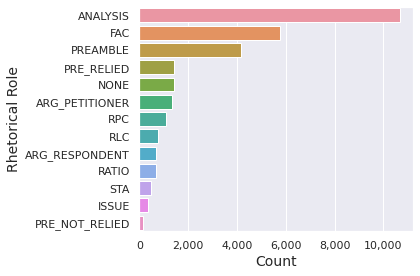

In [58]:
sns.set_theme('notebook')
fig, ax = plt.subplots()
sns.barplot(ax= ax, x= list(plot_data.values()), y= list(plot_data.keys()))
# ax.set_yticks(ticks= range(len(plot_data)), labels= ['PREAMBLE', 'NONE', 'FACT', 'ARGUMENT RESPONDENT', 'RULING BY LOWER COURT', 
            #   'ARGUMENT PETITIONER', 'ANALYSIS', 'PRECEDENT RELIED UPON', 'RATIO', 
            #   'RULING BY PRESENT COURT', 'ISSUE', 'STATUTE', 'PRECEDENT NOT RELIED UPON'], rotation=45);
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));
ax.set_xlabel("Count",fontdict= {'fontsize':14});
ax.set_ylabel("Rhetorical Role",fontdict= {'fontsize':14});
fig.tight_layout()
fig.savefig("../output/LabelDistribution.png", dpi=300)

In [67]:
from operator import itemgetter

In [70]:
print(f"Percentage of data by top 3: {sum(itemgetter('ANALYSIS','FAC','PREAMBLE')(plot_data)) / len(data_train)}")

Percentage of data by top 3: 0.7108949147864486


In [71]:
print(f"Percentage of data by bottom 3: {sum(itemgetter('STA','ISSUE','PRE_NOT_RELIED')(plot_data)) / len(data_train)}")

Percentage of data by bottom 3: 0.034706409991030154


In [76]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'texts': data_train.texts, 'labels': data_train.labels})
df.sample(10)

,texts,labels
9156,"in a criminal case, the veiledobject behind a ...",PREAMBLE
22816,this expediency will normally be judged by the...,ANALYSIS
7489,still he has executed the sale deed on 4.9.200...,ARG_RESPONDENT
20633,dictated and corrected by me.,NONE
24894,"2. briefly stated, the case of the prosecution...",FAC
22156,p.w.1 and p.w.2 both are residents of village ...,FAC
4216,according to the high court the entire approac...,FAC
28444,ultimately it was decided by the supreme court...,FAC
3884,concurrent auditor of the bank also pointed ou...,FAC
14002,"since, in our view, there is no evidence to co...",ANALYSIS


In [79]:
avg_len_dict = {}
for i in plot_data.keys():
    avg_len_dict[i] = int(np.mean(df[df.labels == i]['texts'].apply(len)))

In [86]:
np.mean(list(avg_len_dict.values()))

184.3846153846154

In [87]:
np.std(list(avg_len_dict.values()))

58.53537846930161

In [88]:
avg_len_dict

{'ANALYSIS': 170,
 'FAC': 153,
 'PREAMBLE': 124,
 'PRE_RELIED': 214,
 'NONE': 78,
 'ARG_PETITIONER': 195,
 'RPC': 120,
 'RLC': 194,
 'ARG_RESPONDENT': 192,
 'RATIO': 187,
 'STA': 327,
 'ISSUE': 221,
 'PRE_NOT_RELIED': 222}

In [81]:
sorted_avg_len_dict = dict(sorted(avg_len_dict.items(), key=lambda item: item[1], reverse= True))

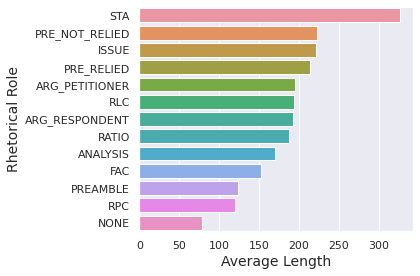

In [84]:
sns.set_theme('notebook')
fig, ax = plt.subplots()
sns.barplot(ax= ax, x= list(sorted_avg_len_dict.values()), y= list(sorted_avg_len_dict.keys()))
# ax.set_yticks(ticks= range(len(plot_data)), labels= ['PREAMBLE', 'NONE', 'FACT', 'ARGUMENT RESPONDENT', 'RULING BY LOWER COURT', 
            #   'ARGUMENT PETITIONER', 'ANALYSIS', 'PRECEDENT RELIED UPON', 'RATIO', 
            #   'RULING BY PRESENT COURT', 'ISSUE', 'STATUTE', 'PRECEDENT NOT RELIED UPON'], rotation=45);
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));
ax.set_xlabel("Average Length",fontdict= {'fontsize':14});
ax.set_ylabel("Rhetorical Role",fontdict= {'fontsize':14});
fig.tight_layout()
fig.savefig("../output/CharacterLen.png", dpi=300)